In [ ]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

mnistdb=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnistdb.load_data()

x_train=x_train.reshape((60000,28*28))
x_test=x_test.reshape((10000,28*28))
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
m=keras.models.Sequential()
m.add(keras.layers.Dense(units=50,activation='relu',input_shape=x_train.shape[1:]))
m.add(keras.layers.Dense(units=100,activation='relu'))
m.add(keras.layers.Dense(units=70,activation='relu'))
m.add(keras.layers.Dense(units=10,activation='softmax'))
m.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 dense_5 (Dense)             (None, 100)               5100      
                                                                 
 dense_6 (Dense)             (None, 70)                7070      
                                                                 
 dense_7 (Dense)             (None, 10)                710       
                                                                 
Total params: 52,130
Trainable params: 52,130
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 1s 2ms/step - loss: 0.2052 - accuracy: 0.9471


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


digit is [1.9470634e-05 9.0953670e-03 1.8167974e-02 7.6178080e-01 3.8953096e-04
 6.3268997e-02 3.1827173e-07 2.5084265e-02 8.9963712e-02 3.2229561e-02]


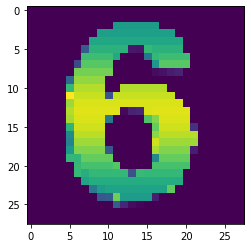

In [ ]:
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
m.fit(x_train,y_train,epochs=1,batch_size=16)
test_loss,test_acc=m.evaluate(x_test,y_test)
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
img=load_img('/content/six.png',grayscale=True,target_size=(28,28))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,28*28)
img=img.astype('float32')
digit=m.predict(img)
print('digit is',digit[0])